In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from warnings import filterwarnings
from sklearn import tree
from numpy import sqrt
import graphviz
from IPython.display import Image

In [2]:
filterwarnings("ignore")
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv("AmazonMobilePhones(Cleaned).csv",index_col = 0)
df

,price,screen_size,screen_type,battery_power,ram,inbuilt_storage,expandable_storage,processor_brand,os,product_brand,rear_camera
0,11499,6.50,LCD,6000.0,6.0,128.0,128.0,Exynos,Android 11,Samsung,48.0
1,13999,6.40,AMOLED,6000.0,6.0,128.0,128.0,Exynos,Android 11,Samsung,48.0
2,8499,6.53,HD+,5000.0,4.0,64.0,64.0,MediaTek,Android,Redmi,13.0
3,12999,6.67,LCD,5020.0,4.0,64.0,64.0,Qualcomm,MIUI 12,Redmi,48.0
4,11499,6.50,LCD,6000.0,6.0,128.0,128.0,Exynos,Android 11,Samsung,48.0
...,...,...,...,...,...,...,...,...,...,...,...
93,7999,6.52,Incell,5000.0,2.0,256.0,64.0,MediaTek,Android 11,Tecno,16.0
94,36999,6.55,AMOLED,4500.0,8.0,128.0,128.0,Qualcomm,Android 11,OnePlus,48.0
95,26999,6.43,AMOLED,4500.0,8.0,128.0,128.0,NaN,Android 11,OnePlus,50.0
96,11990,6.52,LCD,5000.0,3.0,64.0,256.0,Qualcomm,Android 11,Vivo,13.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               98 non-null     int64  
 1   screen_size         98 non-null     float64
 2   screen_type         98 non-null     object 
 3   battery_power       98 non-null     float64
 4   ram                 98 non-null     float64
 5   inbuilt_storage     98 non-null     float64
 6   expandable_storage  98 non-null     float64
 7   processor_brand     80 non-null     object 
 8   os                  95 non-null     object 
 9   product_brand       98 non-null     object 
 10  rear_camera         98 non-null     float64
dtypes: float64(6), int64(1), object(4)
memory usage: 9.2+ KB


In [5]:
df.price.unique()

array([11499, 13999,  8499, 12999, 11490,  9499, 14999,  5399,  7999,
       16999,  4199, 36990,  2064, 29999,  4985, 12499,  1395, 18999,
       20990, 13490, 15499,  7499,  9199, 18990,  9699, 24999,  8974,
       23990,  9490,  7299,  5889,  5999,  4056, 10990,  8799,  7699,
       27999, 15949, 10599, 26990, 17900, 25999,  4499, 15490, 15999,
       28999, 10999, 19490, 11999,  6999,  6799, 13877, 21999,  1810,
       15990,  7399, 14499,  4799, 12998, 10998, 34999, 21990, 24990,
       36999, 26999, 11990], dtype=int64)

In [6]:
df.describe()

,price,screen_size,battery_power,ram,inbuilt_storage,expandable_storage,rear_camera
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,14564.673469,6.296837,4781.836735,6.332408,126.265306,112.837061,45.328673
std,8259.071853,0.726288,1040.845559,12.668055,176.391233,149.444889,107.982422
min,1395.000000,2.400000,1000.000000,0.032000,4.000000,0.032000,0.300000
25%,8499.000000,6.430000,4500.000000,4.000000,40.000000,40.000000,13.000000
50%,12748.500000,6.500000,5000.000000,4.000000,128.000000,64.000000,48.000000
75%,18717.500000,6.527500,5000.000000,6.000000,128.000000,128.000000,50.000000
max,36999.000000,7.120000,7500.000000,128.000000,1024.000000,1024.000000,1080.000000


In [7]:
df.fillna("NA", inplace = True)

In [8]:
df.describe(include = "object")

,screen_type,processor_brand,os,product_brand
count,98,98,98,98
unique,8,10,11,21
top,LCD,MediaTek,Android 11,Samsung
freq,44,39,60,25


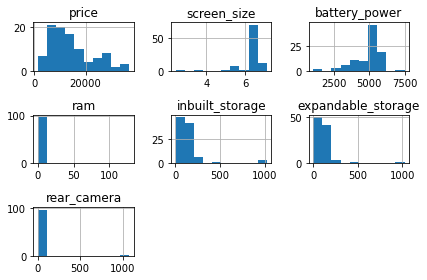

In [9]:
df.hist()
plt.tight_layout()
plt.show()

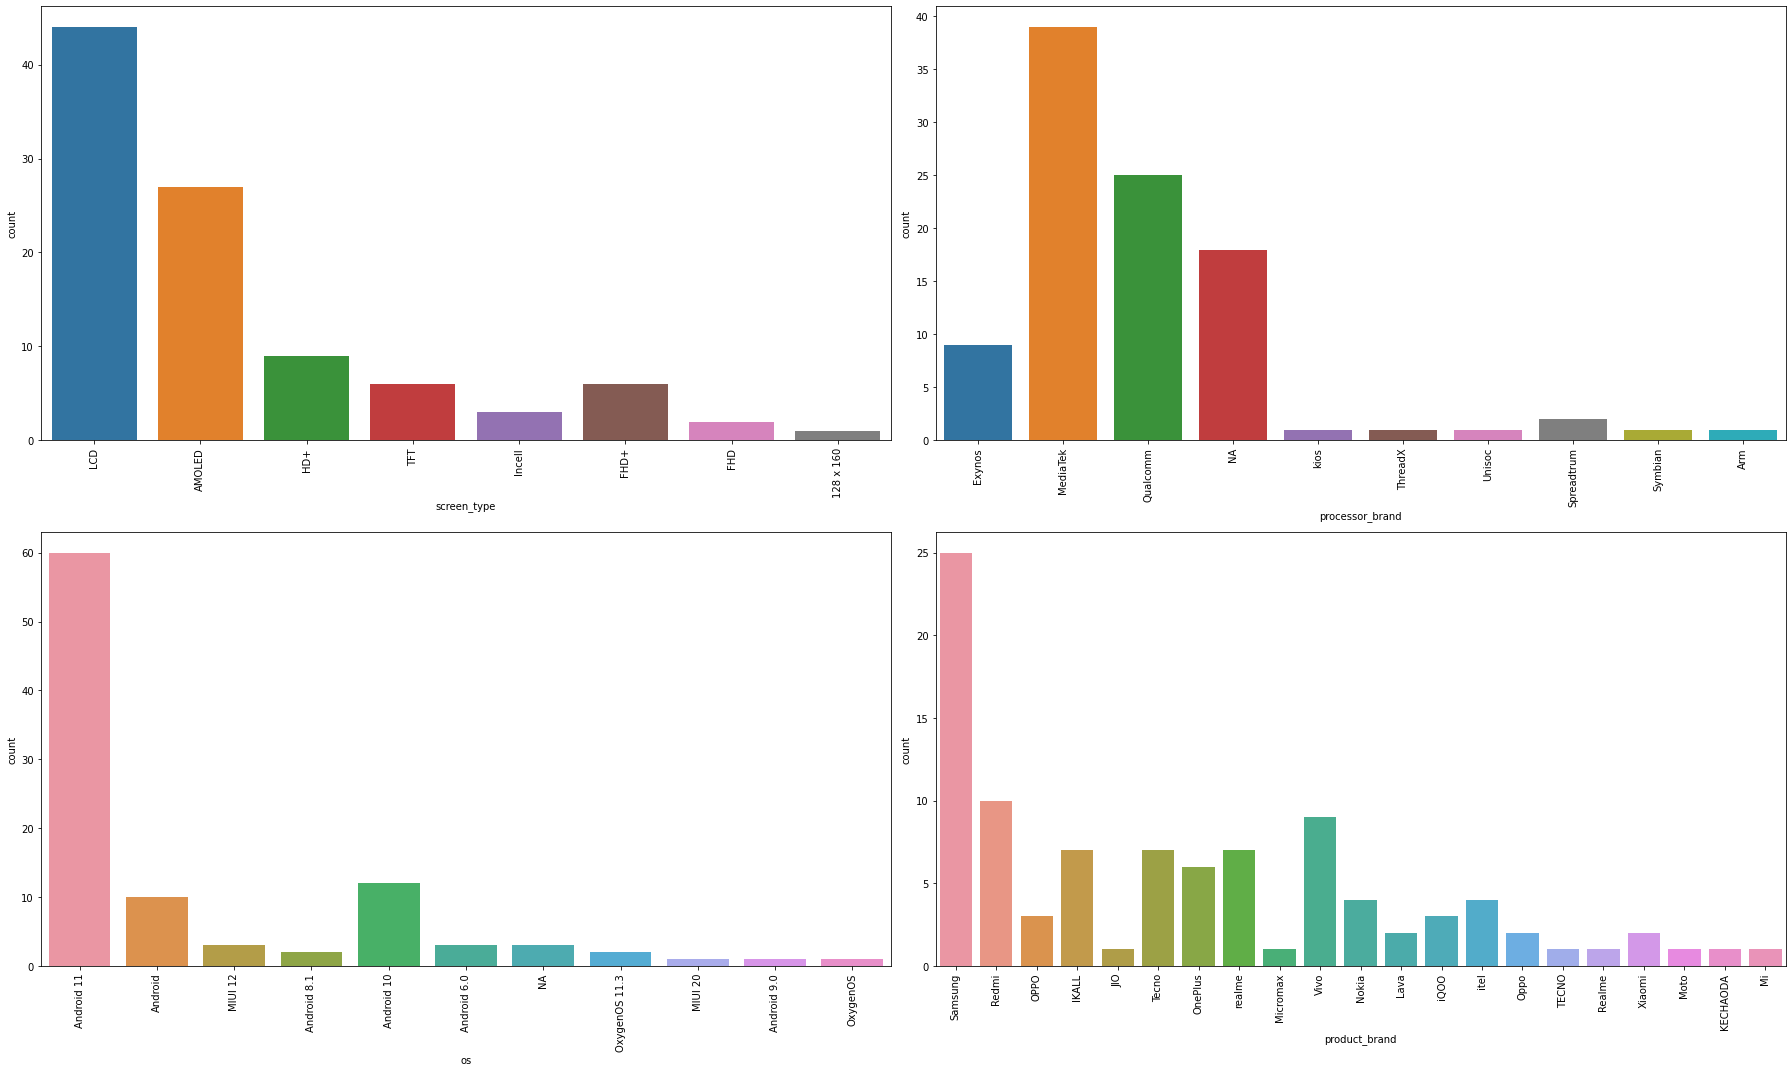

In [10]:
cat_cols = df.select_dtypes(include = "object")
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (25,15))
for i,j in zip(cat_cols, ax.flatten()):
    sns.countplot(df[i], ax = j)
    j.set_xticklabels(labels = df[i].unique(),rotation = 90)
plt.tight_layout()
plt.show()

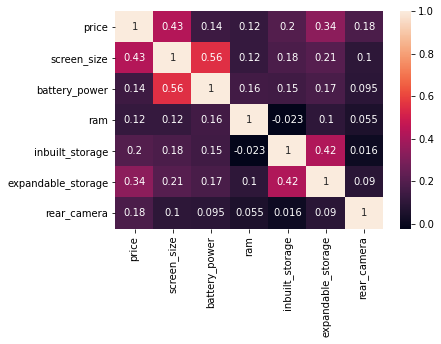

In [11]:
sns.heatmap(df.corr(), annot = True, annot_kws = {"Size": 10})
plt.show()

In [12]:
final_df = pd.get_dummies(df,drop_first = True)
final_df

,price,screen_size,battery_power,ram,inbuilt_storage,expandable_storage,rear_camera,screen_type_AMOLED,screen_type_FHD,screen_type_FHD+,screen_type_HD+,screen_type_Incell,screen_type_LCD,screen_type_TFT,processor_brand_Exynos,processor_brand_MediaTek,processor_brand_NA,processor_brand_Qualcomm,processor_brand_Spreadtrum,processor_brand_Symbian,processor_brand_ThreadX,processor_brand_Unisoc,processor_brand_kios,os_Android 10,os_Android 11,os_Android 6.0,os_Android 8.1,os_Android 9.0,os_MIUI 12,os_MIUI 20,os_NA,os_OxygenOS,os_OxygenOS 11.3,product_brand_JIO,product_brand_KECHAODA,product_brand_Lava,product_brand_Mi,product_brand_Micromax,product_brand_Moto,product_brand_Nokia,product_brand_OPPO,product_brand_OnePlus,product_brand_Oppo,product_brand_Realme,product_brand_Redmi,product_brand_Samsung,product_brand_TECNO,product_brand_Tecno,product_brand_Vivo,product_brand_Xiaomi,product_brand_iQOO,product_brand_itel,product_brand_realme
0,11499,6.50,6000.0,6.0,128.0,128.0,48.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,13999,6.40,6000.0,6.0,128.0,128.0,48.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,8499,6.53,5000.0,4.0,64.0,64.0,13.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,12999,6.67,5020.0,4.0,64.0,64.0,48.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,11499,6.50,6000.0,6.0,128.0,128.0,48.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,7999,6.52,5000.0,2.0,256.0,64.0,16.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
94,36999,6.55,4500.0,8.0,128.0,128.0,48.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
95,26999,6.43,4500.0,8.0,128.0,128.0,50.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
96,11990,6.52,5000.0,3.0,64.0,256.0,13.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [13]:
x = final_df.drop("price", axis = 1)
y = final_df.price
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 10)

In [14]:
lr = LinearRegression()
lr_model = lr.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("R-Squared: ", r2_score(y_test, y_pred_lr))

RMSE:  2514.7142732184802
R-Squared:  0.8439035610889671


In [15]:
sgd = SGDRegressor()
sgd_model = sgd.fit(x_train,y_train)
y_pred_sgd = sgd_model.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_sgd)))
print("R-Squared: ", r2_score(y_test, y_pred_sgd))

RMSE:  1.9182731754570744e+16
R-Squared:  -9.083152576866255e+24


In [16]:
dt = DecisionTreeRegressor()
dt_model = dt.fit(x_train,y_train)
y_pred_dt = dt_model.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print("R-Squared: ", r2_score(y_test, y_pred_dt))

RMSE:  4165.203992603484
R-Squared:  0.5717589907663758


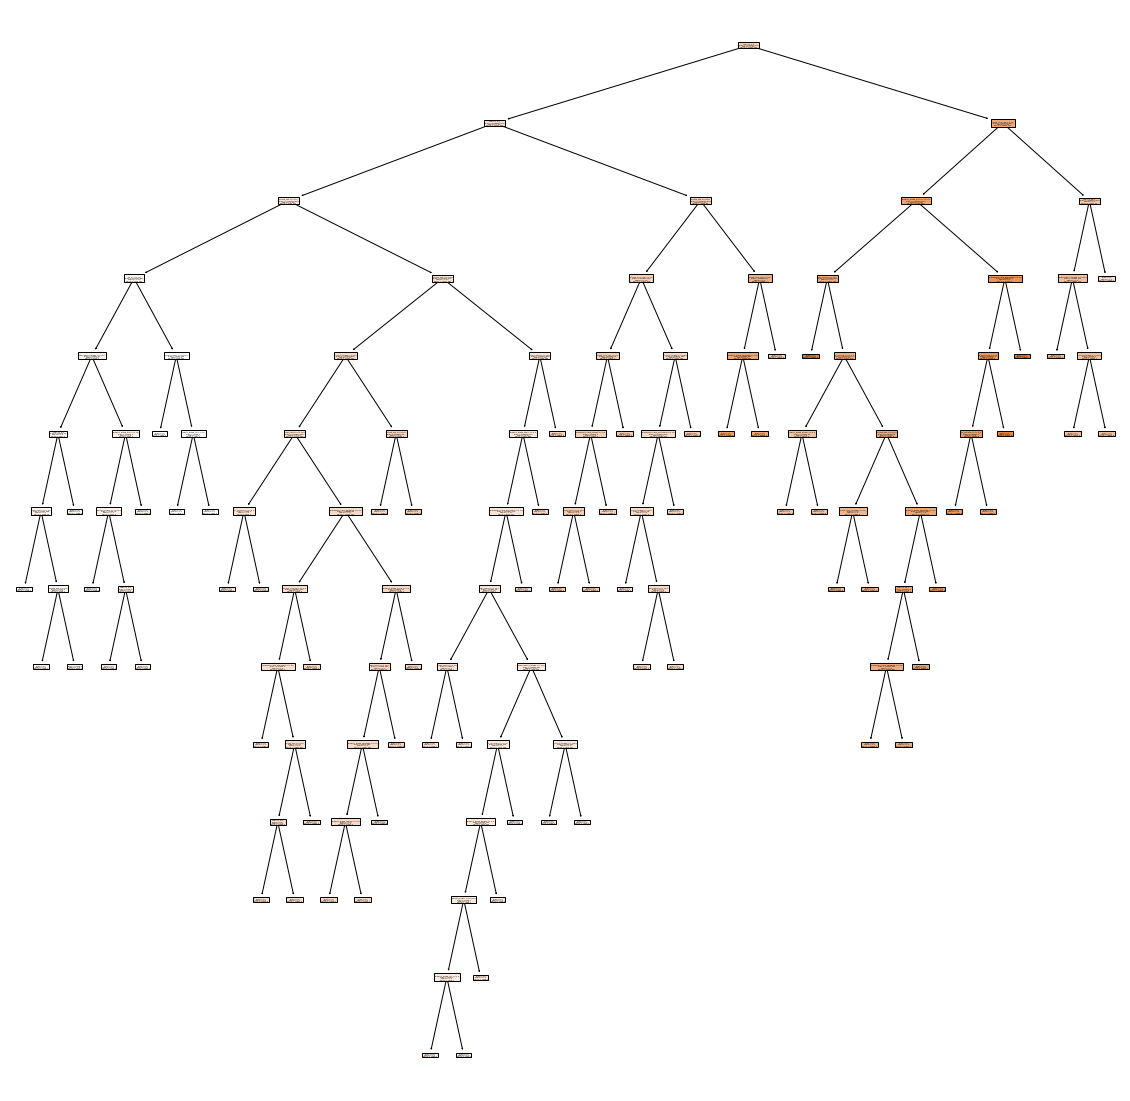

In [17]:
fig = plt.figure(figsize = (20,20))
_ = tree.plot_tree(dt_model, feature_names = x_train.columns, filled =True)

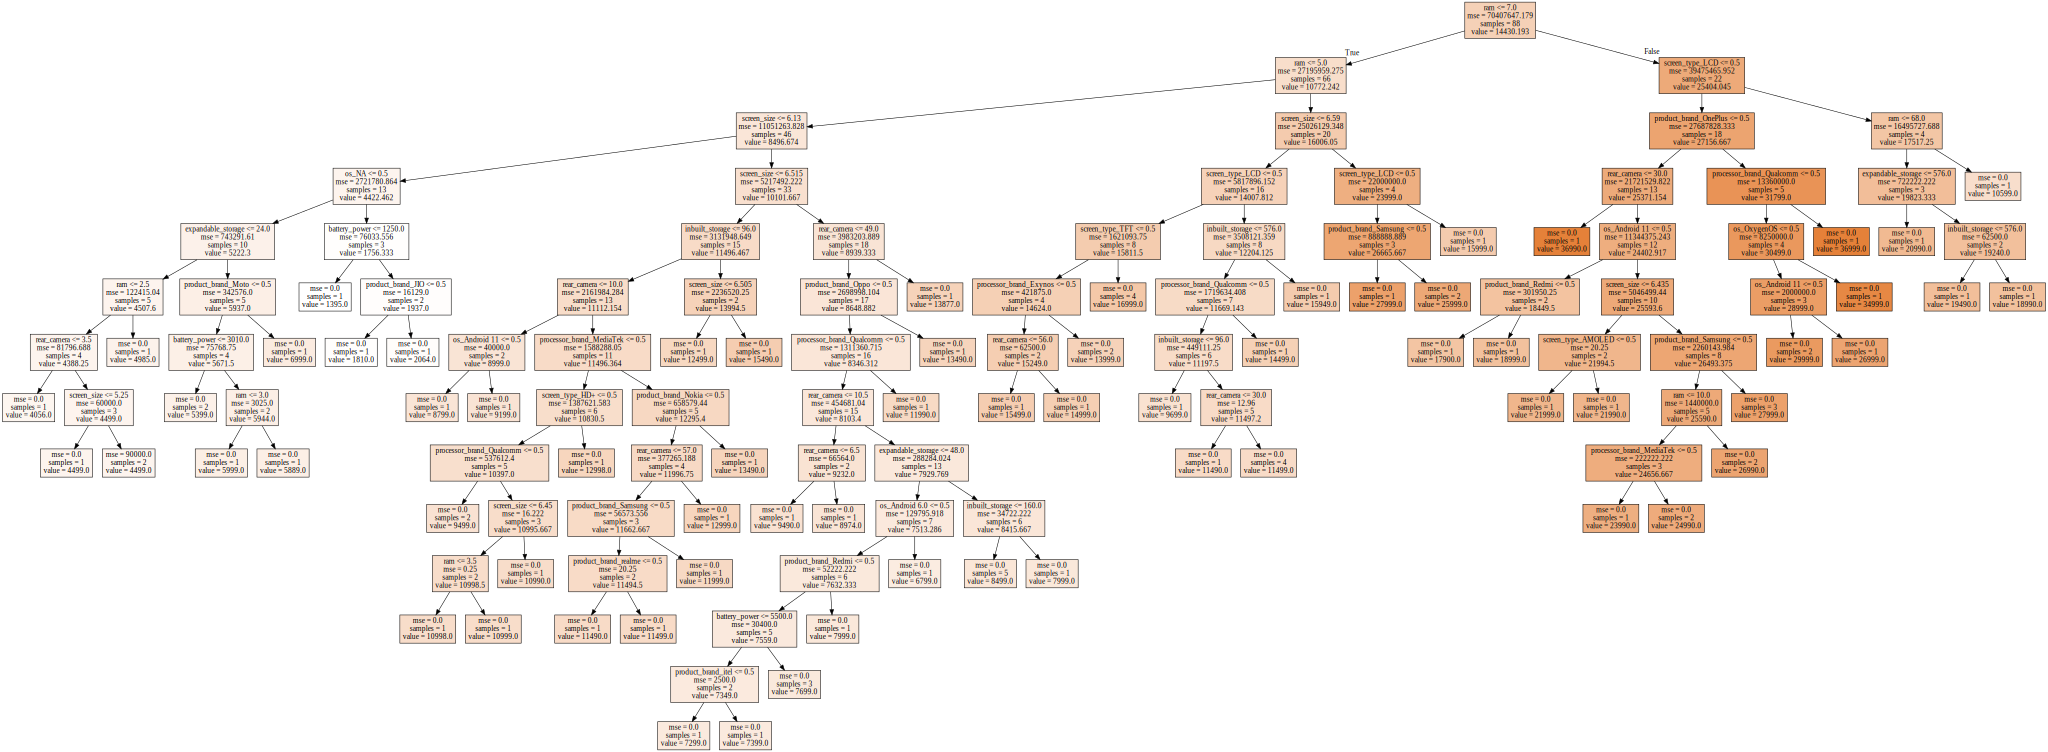

In [18]:
dot_data = tree.export_graphviz(dt_model,feature_names = x_train.columns, class_names = ["0","1","2","3"], filled =True, out_file =None)
graph = graphviz.Source(dot_data, format = "png")
graph

In [19]:
rf = RandomForestRegressor()
rf_model = rf.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("R-Squared: ", r2_score(y_test, y_pred_rf))

RMSE:  2668.627442150739
R-Squared:  0.8242110398388016


In [20]:
bag = BaggingRegressor()
bag_model = bag.fit(x_train,y_train)
y_pred_bag = bag_model.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_bag)))
print("R-Squared: ", r2_score(y_test, y_pred_bag))

RMSE:  2578.5743200458655
R-Squared:  0.8358748982703169


In [21]:
ada = AdaBoostRegressor()
ada_model = ada.fit(x_train,y_train)
y_pred_ada = ada_model.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_ada)))
print("R-Squared: ", r2_score(y_test, y_pred_ada))

RMSE:  3396.471739910145
R-Squared:  0.7152447678124754


In [22]:
xgb = XGBRegressor()
xgb_model = xgb.fit(x_train,y_train)
y_pred_xgb = xgb_model.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_xgb)))
print("R-Squared: ", r2_score(y_test, y_pred_xgb))

RMSE:  5454.405274820837
R-Squared:  0.2656374696296404


In [23]:
svr = SVR()
svr_model = svr.fit(x_train,y_train)
y_pred_svr = svr_model.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_svr)))
print("R-Squared: ", r2_score(y_test, y_pred_svr))

RMSE:  7519.831624247875
R-Squared:  -0.39582809266506214


In [24]:
pd.DataFrame({"Model Name":["Linear Regression Model","SGD Model","Decision Tree Model",
                           "Random Forest Model", "Bagging Model", "AdaBoost Model", "XGBoost Model",
                           "SVM model"],
             "R-Squared":[lr.score(x_train, y_train), sgd.score(x_train, y_train),
                          dt.score(x_train,y_train),rf.score(x_train,y_train), bag.score(x_train,y_train),
                         ada.score(x_train, y_train), xgb.score(x_train, y_train), svr.score(x_train, y_train)],
             "RMSE":[sqrt(mean_squared_error(y_test,y_pred_lr)),sqrt(mean_squared_error(y_test,y_pred_sgd)),
                    sqrt(mean_squared_error(y_test,y_pred_dt)),sqrt(mean_squared_error(y_test,y_pred_rf)),
                    sqrt(mean_squared_error(y_test,y_pred_bag)),sqrt(mean_squared_error(y_test,y_pred_ada)),
                    sqrt(mean_squared_error(y_test,y_pred_xgb)), sqrt(mean_squared_error(y_test,y_pred_svr))]})

,Model Name,R-Squared,RMSE
0,Linear Regression Model,9.698946e-01,2.514714e+03
1,SGD Model,-4.947461e+24,1.918273e+16
2,Decision Tree Model,9.999709e-01,4.165204e+03
3,Random Forest Model,9.820819e-01,2.668627e+03
4,Bagging Model,9.656498e-01,2.578574e+03
5,AdaBoost Model,9.462538e-01,3.396472e+03
6,XGBoost Model,9.999709e-01,5.454405e+03
7,SVM model,-1.023968e-01,7.519832e+03
